In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN 

In [2]:
df = pd.read_csv('sensor10d.csv') 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 34 columns):
Unnamed: 0            400000 non-null int64
 Altitude             400000 non-null float64
 Apogee               400000 non-null float64
 Arg Perigee          400000 non-null float64
 Country              400000 non-null object
 Declination          400000 non-null float64
 Error Vis Mag        400000 non-null float64
 Inclination          400000 non-null float64
 Inclination bin      400000 non-null int64
 Is stable            400000 non-null object
 Latitude             400000 non-null float64
 Latitude bin         400000 non-null int64
 Longitude            400000 non-null float64
 Longitude bin        400000 non-null int64
 Mean Motion          400000 non-null float64
 Name                 400000 non-null object
 RCS                  400000 non-null float64
 Right Ascension      400000 non-null float64
 Right ascension      400000 non-null float64
 Rotation rate        4000

In [5]:
del df['Unnamed: 0']


In [6]:
df.head(1)

,Altitude,Apogee,Arg Perigee,Country,Declination,Error Vis Mag,Inclination,Inclination bin,Is stable,Latitude,...,Visual Magnitude,X,Y,Z,obs time,observation time,Satellite Number,day,hour,time
0,35737.51549,35771.05728,178.5811,CIS,-0.07044,0.040564,14.2372,14,true,-0.656626,...,8.26375,-11256.69114,-40580.56442,-482.157556,2017 001 14:07:00,1.480000e+12,23426,1,14,14:07:00


In [8]:
# select one day 
df1 = df[df['day'] == 1]
df1['day'].tail()

309995    1
309996    1
309997    1
309998    1
309999    1
Name: day, dtype: int64

In [129]:
ypredict = pd.DataFrame(data=ypred, columns = ['predicted'])
ypredict = ypredict.iloc[:40000, :]
ypredict.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
predicted    40000 non-null int32
dtypes: int32(1)
memory usage: 156.3 KB


In [9]:
features = df1[[' Longitude', ' Latitude', ' Altitude', ' X', ' Y', ' Z', 'hour']]

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

In [111]:
fit.n_features_

3

In [112]:
fit.support_

array([ True,  True,  True])

In [113]:
fit.ranking_

array([1, 1, 1])

In [5]:
## df 400K
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 33 columns):
 Altitude             400000 non-null float64
 Apogee               400000 non-null float64
 Arg Perigee          400000 non-null float64
 Country              400000 non-null object
 Declination          400000 non-null float64
 Error Vis Mag        400000 non-null float64
 Inclination          400000 non-null float64
 Inclination bin      400000 non-null int64
 Is stable            400000 non-null object
 Latitude             400000 non-null float64
 Latitude bin         400000 non-null int64
 Longitude            400000 non-null float64
 Longitude bin        400000 non-null int64
 Mean Motion          400000 non-null float64
 Name                 400000 non-null object
 RCS                  400000 non-null float64
 Right Ascension      400000 non-null float64
 Right ascension      400000 non-null float64
 Rotation rate        400000 non-null float64
 Rotation rate bin    40

In [6]:
df.describe()

,Altitude,Apogee,Arg Perigee,Declination,Error Vis Mag,Inclination,Inclination bin,Latitude,Latitude bin,Longitude,...,Rotation rate,Rotation rate bin,Sensor Number,X,Y,Z,observation time,Satellite Number,day,hour
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,4.000000e+05,400000.000000,400000.000000,400000.000000
mean,36201.176465,36705.704695,208.813930,0.063848,0.061320,7.836938,7.824845,2.966174,2.519340,202.103344,...,408.938365,408.963840,433.925000,-6915.905885,-5863.051592,2190.264264,1.482739e+12,24859.529155,5.450000,10.546622
std,3359.509501,4586.526578,91.309409,0.149659,0.054521,7.206560,7.215832,6.606058,6.591441,93.119619,...,443.938504,443.960134,117.738711,30969.960133,27464.939471,4878.162925,1.597139e+09,10351.903640,2.915051,6.103272
min,1046.890646,32808.586530,0.034300,-1.024037,0.000049,0.001100,0.000000,-55.387497,-56.000000,0.003047,...,0.000000,0.000000,230.000000,-80104.018690,-79922.836780,-34693.607580,1.480000e+12,858.000000,1.000000,0.000000
25%,35786.412288,35796.892219,152.365000,-0.058388,0.015811,0.222500,0.000000,-0.005447,-1.000000,140.224496,...,0.000000,0.000000,433.250000,-35983.227357,-33672.973252,-4.002416,1.482422e+12,18351.000000,3.000000,6.000000
50%,35803.872382,35840.976750,225.031900,0.073355,0.044858,6.944200,7.000000,0.903389,0.000000,194.820263,...,0.000000,0.000000,501.000000,-15060.047090,-6604.622235,659.981348,1.483490e+12,25010.000000,5.500000,10.000000
75%,36116.377751,36180.946240,275.308600,0.156480,0.093418,14.194400,14.000000,7.285207,7.000000,275.012449,...,826.053966,826.000000,502.250000,27035.803095,17756.620497,5379.359029,1.483800e+12,32951.000000,8.000000,15.000000
max,73742.895580,73740.665793,359.827800,0.802444,0.238065,57.625200,58.000000,45.432580,45.000000,359.997762,...,1199.693313,1200.000000,503.000000,70794.343779,76127.304180,31976.509412,1.484093e+12,41904.000000,10.000000,23.000000


In [7]:
## create df dealing with one df 
## df1 40K 
df1 = df[df['day'] == 1]
df1.head()

,Altitude,Apogee,Arg Perigee,Country,Declination,Error Vis Mag,Inclination,Inclination bin,Is stable,Latitude,...,Visual Magnitude,X,Y,Z,obs time,observation time,Satellite Number,day,hour,time
0,35737.51549,35771.05728,178.5811,CIS,-0.070440,0.040564,14.2372,14,true,-0.656626,...,8.26375,-11256.69114,-40580.564420,-482.157556,2017 001 14:07:00,1.480000e+12,23426,1,14,14:07:00
1,36733.92608,36780.46962,269.5060,ESA,-0.152637,0.091370,16.0542,16,false,-5.096773,...,10.4792,-38209.08187,19597.484590,-3826.219645,2017 001 06:34:00,1.480000e+12,19215,1,6,6:34:00
2,35814.38747,35820.26375,252.1854,CIS,0.216703,0.055657,14.9491,15,true,13.680775,...,9.31727,-39502.68753,-10966.334070,9969.225675,2017 001 12:07:30,1.480000e+12,20391,1,12,12:07:30
3,35888.99453,36008.54903,183.8034,US,0.000990,0.087396,3.3915,3,true,3.093411,...,11.9571,-42167.84461,-1784.893194,2278.601658,2017 001 07:55:00,1.480000e+12,38093,1,7,7:55:00
4,36012.82548,36022.03258,234.9380,CA,0.100919,0.018136,14.6257,15,true,8.002605,...,9.59603,-40450.09443,-11224.483490,5895.702995,2017 001 05:32:00,1.480000e+12,11153,1,5,5:32:00


In [16]:
df1.tail()

,Altitude,Apogee,Arg Perigee,Country,Declination,Error Vis Mag,Inclination,Inclination bin,Is stable,Latitude,...,Visual Magnitude,X,Y,Z,obs time,observation time,Satellite Number,day,hour,time
309995,35753.167392,35755.738772,300.4902,BRAZ,-0.008541,0.005716,3.7122,4,false,3.640136,...,9.995488046035213,17224.821491,-38356.281055,2672.194865,2017 001 07:22:30,1.483255e+12,25152,1,7,07:22:30
309996,35788.344308,35796.945610,38.8370,NOR,-0.080797,0.034561,0.0494,0,false,0.031474,...,9.730544354185886,42163.065790,-536.026456,23.139945,2017 001 19:29:30,1.483299e+12,32487,1,19,19:29:30
309997,36893.927703,36897.389074,274.8135,CIS,0.229999,0.037443,16.0047,16,false,15.793420,...,7.752266835497644,38516.055554,15824.214771,11766.152555,2017 001 20:52:30,1.483304e+12,17083,1,20,20:52:30
309998,35784.736993,35795.843081,342.9043,PRC,-0.081906,0.049439,0.0920,0,false,-0.075927,...,8.955402469780653,41439.784155,7774.891977,-55.816585,2017 001 04:12:30,1.483244e+12,38730,1,4,04:12:30
309999,36605.822957,36930.810610,208.4626,US,0.096578,0.063200,8.8437,9,false,8.846262,...,11.432465213990623,42452.143703,1335.422287,6603.742866,2017 001 19:57:30,1.483301e+12,21052,1,19,19:57:30


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 309999
Data columns (total 34 columns):
Unnamed: 0            40000 non-null int64
 Altitude             40000 non-null float64
 Apogee               40000 non-null float64
 Arg Perigee          40000 non-null float64
 Country              40000 non-null object
 Declination          40000 non-null float64
 Error Vis Mag        40000 non-null float64
 Inclination          40000 non-null float64
 Inclination bin      40000 non-null int64
 Is stable            40000 non-null object
 Latitude             40000 non-null float64
 Latitude bin         40000 non-null int64
 Longitude            40000 non-null float64
 Longitude bin        40000 non-null int64
 Mean Motion          40000 non-null float64
 Name                 40000 non-null object
 RCS                  40000 non-null float64
 Right Ascension      40000 non-null float64
 Right ascension      40000 non-null float64
 Rotation rate        40000 non-null float64
 

In [9]:
# features
xh = df1[[' Longitude', ' Latitude', 'hour']]

In [10]:
# density based spatial clustering with nosie 
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=30)
db.fit(xh)

DBSCAN(algorithm='auto', eps=10, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=30, n_jobs=1, p=None)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


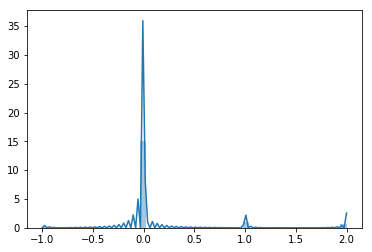

In [12]:
### DBSCAN - min samples = 30, epsilon = 10 
import seaborn as sns 
ynew = db.fit_predict(xh)
# visualize cluster distribution 
sns.distplot(ynew)

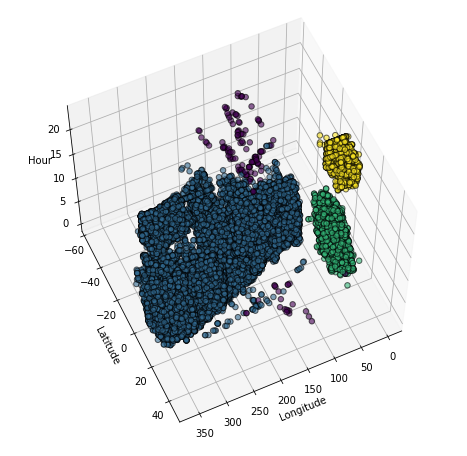

In [28]:
## visualize day1, by the hour
## x - latitude, y - longitude, and z - hour 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(xh.iloc[:, 0], xh.iloc[:, 1], xh.iloc[:, 2], c = ynew, edgecolor = 'black', alpha = .6, s=30, cmap='viridis')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Hour')
ax.view_init(60, 65)
plt.show() 

In [14]:
## KMeans 

from sklearn.cluster import KMeans 
km3 = KMeans(n_clusters = 3)

# ypred cluster assignment 
ypred = km3.fit_predict(xh)

In [15]:
km3.inertia_

53076741.83979049

In [17]:
centers = km3.cluster_centers_ 
centers

array([[ 18.44103598,   2.45301863,  10.31691649],
       [288.02605082,   2.95627583,   8.01881212],
       [159.25224334,   3.21198441,  12.31197647]])

Text(0.5,0.92,'K Means cluster visualization (3 clusters)')

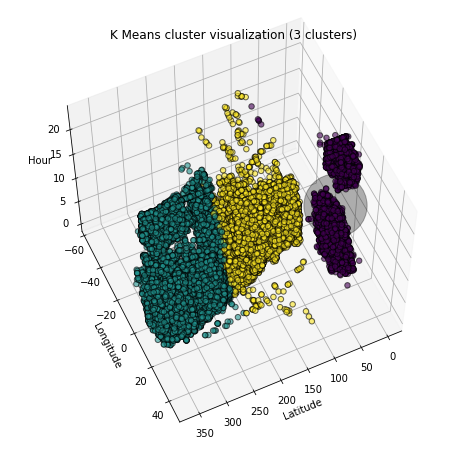

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(xh.iloc[:, 0], xh.iloc[:, 1], xh.iloc[:, 2], c=ypred, edgecolor = 'black', alpha = .6, s=30, cmap='viridis')

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=4000, edgecolor= 'black', alpha=0.3)
ax.view_init(60, 65)
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_zlabel('Hour')
plt.title('K Means cluster visualization (3 clusters)')

In [20]:
#### Agglomerative 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
# y_hc cluster assignments for HAC 
y_hc = hc.fit_predict(xh)


In [23]:
newx = xh.as_matrix()
newx[y_hc == 0, 0]

array([152.8466573, 182.4237861, 178.1426414, ..., 149.5386099,
       100.6338651, 124.8600197])

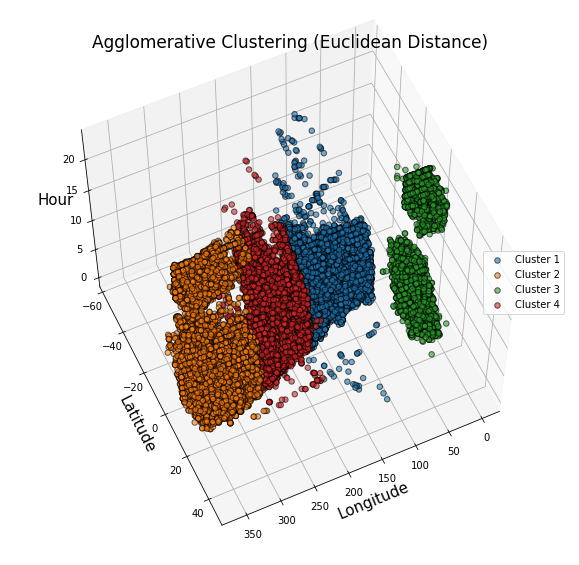

In [24]:
# Visualising the clusters
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(newx[y_hc == 0, 0], newx[y_hc == 0, 1], newx[y_hc == 0, 2], edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 1')
ax.scatter(newx[y_hc == 1, 0], newx[y_hc == 1, 1], newx[y_hc == 1, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 2')
ax.scatter(newx[y_hc == 2, 0], newx[y_hc == 2, 1], newx[y_hc == 2, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 3')
ax.scatter(newx[y_hc == 3, 0], newx[y_hc == 3, 1], newx[y_hc == 3, 2],  edgecolor = 'black', alpha = .6, s=30,cmap = 'viridis', label = 'Cluster 4')

plt.title('Agglomerative Clustering (Euclidean Distance)', fontsize = 17)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
ax.set_zlabel('Hour', fontsize = 15)
ax.view_init(60, 65)
plt.legend(loc = 'center right')
plt.show()
 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


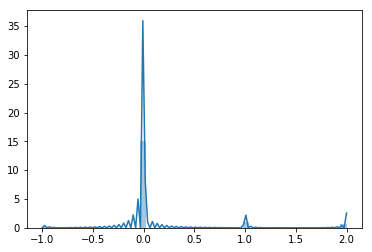

In [26]:
import seaborn as sns 
sns.distplot(ynew)

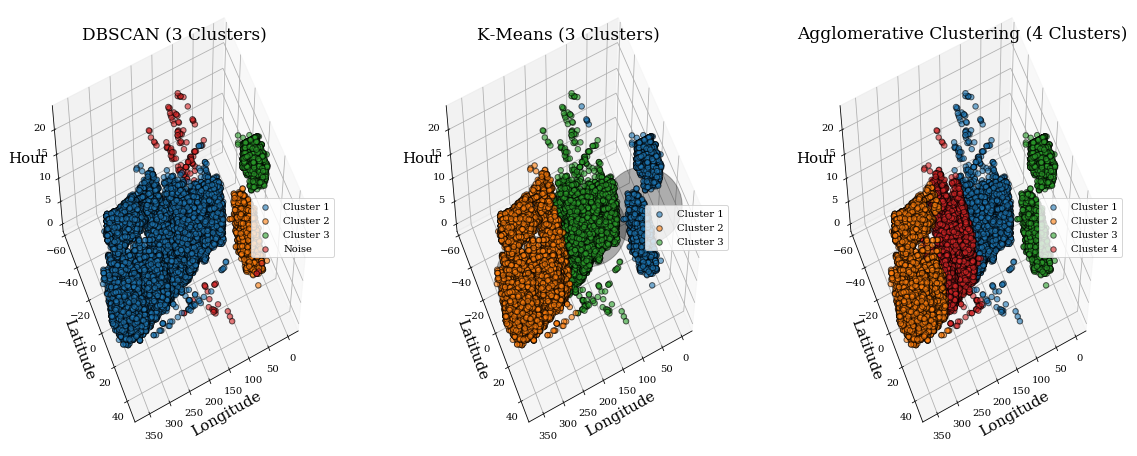

In [30]:
## visualize day1, by the hour
## x - latitude, y - longitude, and z - hour 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
plt.rcParams["font.family"] = "serif"
fig = plt.figure(figsize= (20, 8))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(newx[ynew == 0, 0], newx[ynew == 0, 1], newx[ynew == 0, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 1')
ax.scatter(newx[ynew == 1, 0], newx[ynew == 1, 1], newx[ynew == 1, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 2')
ax.scatter(newx[ynew == 2, 0], newx[ynew == 2, 1], newx[ynew == 2, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 3')
ax.scatter(newx[ynew == -1, 0], newx[ynew == -1, 1], newx[ynew == -1, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Noise')

plt.title('DBSCAN (3 Clusters)', fontsize = 17)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
ax.set_zlabel('Hour', fontsize = 15)
ax.view_init(60, 65)
plt.legend(loc = 'center right')



## visualize day1, by the hour
## x - latitude, y - longitude, and z - hour 


ax = fig.add_subplot(1, 3, 2, projection='3d')
# Visualising the clusters
ax.scatter(newx[ypred == 0, 0], newx[ypred == 0, 1], newx[ypred == 0, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 1')
ax.scatter(newx[ypred == 1, 0], newx[ypred == 1, 1], newx[ypred == 1, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 2')
ax.scatter(newx[ypred == 2, 0], newx[ypred == 2, 1], newx[ypred == 2, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 3')
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=6000, edgecolor= 'black', alpha=.3)
plt.title('K-Means (3 Clusters)', fontsize = 17)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
ax.set_zlabel('Hour', fontsize = 15)
ax.view_init(60, 65)
plt.legend(loc = 'center right')

## visualize day1, by the hour
## x - latitude, y - longitude, and z - hour 



ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(newx[y_hc == 0, 0], newx[y_hc == 0, 1], newx[y_hc == 0, 2], edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 1')
ax.scatter(newx[y_hc == 1, 0], newx[y_hc == 1, 1], newx[y_hc == 1, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 2')
ax.scatter(newx[y_hc == 2, 0], newx[y_hc == 2, 1], newx[y_hc == 2, 2],  edgecolor = 'black', alpha = .6, s=30, cmap = 'viridis', label = 'Cluster 3')
ax.scatter(newx[y_hc == 3, 0], newx[y_hc == 3, 1], newx[y_hc == 3, 2],  edgecolor = 'black', alpha = .6, s=30,cmap = 'viridis', label = 'Cluster 4')

plt.title('Agglomerative Clustering (4 Clusters)', fontsize = 17)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
ax.set_zlabel('Hour', fontsize = 15)
ax.view_init(60, 65)
plt.legend(loc = 'center right')



plt.show() 




In [32]:
 cluster_labels = pd.DataFrame(
    {'DBSCAN': ynew,
     'K-Means': ypred,
     'HAC': y_hc
     })
    
cluster_labels.head()

,DBSCAN,HAC,K-Means
0,0,3,1
1,0,0,2
2,0,3,2
3,0,0,2
4,0,3,2


In [44]:
cluster_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40004 entries, 0 to 40003
Data columns (total 3 columns):
DBSCAN     40004 non-null int64
HAC        40004 non-null int64
K-Means    40004 non-null int32
dtypes: int32(1), int64(2)
memory usage: 781.4 KB


In [33]:
xh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 309999
Data columns (total 3 columns):
 Longitude    40000 non-null float64
 Latitude     40000 non-null float64
hour          40000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 MB


In [55]:
xh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 309999
Data columns (total 3 columns):
 Longitude    40000 non-null float64
 Latitude     40000 non-null float64
hour          40000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 MB


In [35]:
x2 = xh.reset_index(drop = True)
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 Longitude    40000 non-null float64
 Latitude     40000 non-null float64
hour          40000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 937.6 KB


In [41]:
data = pd.concat([x2, cluster_labels], axis = 1)
data.tail()

,Longitude,Latitude,hour,DBSCAN,HAC,K-Means
39995,294.183625,3.640136,7,0,1,1
39996,359.271628,0.031474,19,0,1,1
39997,22.335174,15.793420,20,2,2,0
39998,10.626243,-0.075927,4,1,2,0
39999,1.801766,8.846262,19,2,2,0


In [43]:
satnumber = df1['Satellite Number'].reset_index(drop = True)

In [44]:
data1 = pd.concat([data, satnumber],  axis = 1)
data1.head()

,Longitude,Latitude,hour,DBSCAN,HAC,K-Means,Satellite Number
0,254.496454,-0.656626,14,0,3,1,23426
1,152.846657,-5.096773,6,0,0,2,19215
2,195.515177,13.680775,12,0,3,2,20391
3,182.423786,3.093411,7,0,0,2,38093
4,195.508785,8.002605,5,0,3,2,11153


In [88]:
## save data 
data1.to_csv('clusteringComparison.csv')

In [45]:
data1.isnull().sum()

 Longitude          0
 Latitude           0
hour                0
DBSCAN              0
HAC                 0
K-Means             0
Satellite Number    0
dtype: int64

In [49]:
dd=pd.melt(data1,id_vars=[' Latitude'],value_vars=['DBSCAN','HAC', 'K-Means'], var_name='Models')
d2=pd.melt(data1,id_vars=[' Longitude'],value_vars=['DBSCAN','HAC', 'K-Means'], var_name='Models')
d3=pd.melt(data1,id_vars=['hour'],value_vars=['DBSCAN','HAC', 'K-Means'], var_name='Models')

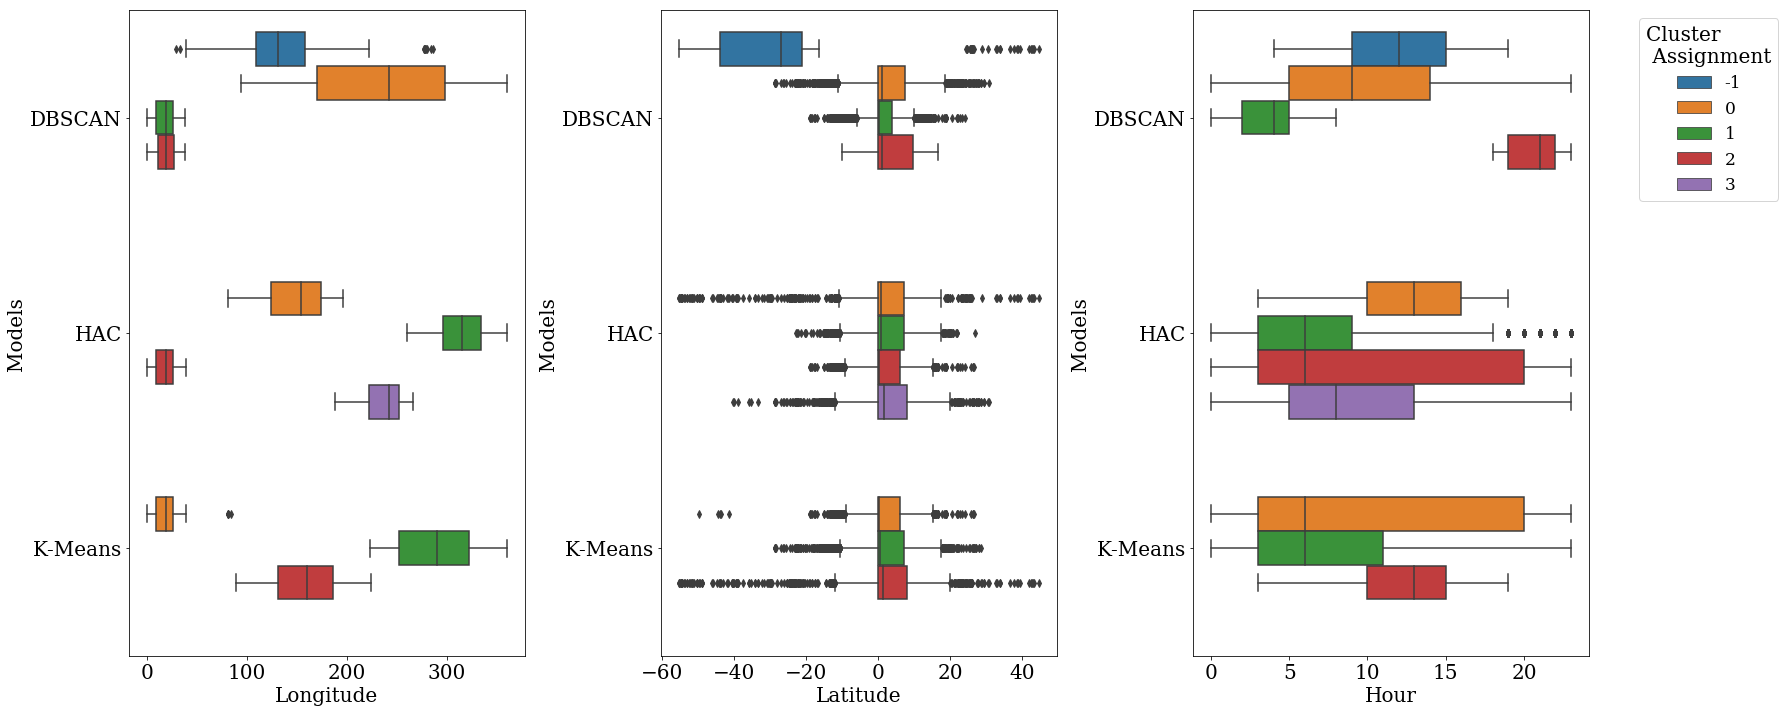

In [50]:
plt.rcParams["font.family"] = "serif"

plt.figure(figsize= (25, 10))
plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"

plt.subplot(1, 3, 1)
sns.boxplot(x=' Longitude',y='Models',data=d2,hue='value')
plt.xlabel('Longitude', fontsize = 20)
plt.ylabel('Models', fontsize = 20)
plt.legend().set_visible(False) 


plt.subplot(1, 3, 2)
sns.boxplot(x=' Latitude',y='Models',data=dd,hue='value')
plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('Models', fontsize = 20)
plt.legend().set_visible(False) 

plt.subplot(1, 3, 3)
sns.boxplot(x='hour',y='Models',data=d3,hue='value')
legend = plt.legend(loc = 'upper right' , bbox_to_anchor=(1.5, 1.00), title="Cluster \n Assignment", fontsize =17)
plt.setp(legend.get_title(),fontsize= 20)
plt.xlabel('Hour', fontsize = 20)
plt.ylabel('Models', fontsize = 20)

#plt.tick_params(fontsize = 'large')
#plt.set_xticklabels(fontsize=15) 

plt.tight_layout()
plt.savefig('cluster_boxplot.png')
plt.show()

